- Tokenizing
- Cleaning the text- remove stopwords/ punctuation/stemming
- Vectorize - converting numeric form
- Machine Learning algorithm - fit/train model
- spam filter - to filter emails


In [1]:
# importing required librries
# Data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading the dataset
data = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
# viewing the first five rows
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# columns
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
# dropping the unwanted columns
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis='columns')

In [6]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# renaming the columns
data = data.rename(columns={"v1":"label", "v2":"text"})

In [8]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# taking the length if the words
data['length'] = data['text'].apply(lambda x: len(x) - x.count(' '))
data.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",92
1,ham,Ok lar... Joking wif u oni...,24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
3,ham,U dun say so early hor... U c already then say...,39
4,ham,"Nah I don't think he goes to usf, he lives aro...",49


In [10]:
# analysing the shape
data.shape

(5572, 3)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
 2   length  5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [12]:
print("out of {} rows, {} are spam, {} are ham".format(len(data), len(data[data['label']=='spam']),len(data[data['label']=='ham'])))

out of 5572 rows, 747 are spam, 4825 are ham


In [13]:
# checking for missing values
data.isnull().sum()

label     0
text      0
length    0
dtype: int64

### Remove Punctuation   

In [14]:
import string

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_punct(text):
    text_nopunct = ''.join([char for char in text if char not in string.punctuation])
    return text_nopunct

data['text_clean'] = data['text'].apply(lambda x:remove_punct(x))


In [17]:
data.head()

,label,text,length,text_clean
0,ham,"Go until jurong point, crazy.. Available only ...",92,Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,24,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,39,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,Nah I dont think he goes to usf he lives aroun...


### Tokenization

In [18]:
import re

In [19]:
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

data['text_tokenize'] = data['text_clean'].apply(lambda x: tokenize(x.lower()))

In [20]:
data.head()

,label,text,length,text_clean,text_tokenize
0,ham,"Go until jurong point, crazy.. Available only ...",92,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,24,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,39,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


### Remove stopwords

In [21]:
import nltk

In [22]:
stopword = nltk.corpus.stopwords.words('english')

In [23]:
def remove_stopwords(tokenized_list):
    body_text = [word for word in tokenized_list if word not in stopword]
    return body_text

data['text_stopwords'] = data['text_tokenize'].apply(lambda x: remove_stopwords(x))

In [24]:
data.head()

,label,text,length,text_clean,text_tokenize,text_stopwords
0,ham,"Go until jurong point, crazy.. Available only ...",92,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,24,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,39,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


### Stemming

In [25]:
ps = nltk.PorterStemmer()

In [26]:
def stemmer(text):
    stem_body = [ps.stem(word) for word in text]
    return stem_body

data['text_stemed'] = data['text_stopwords'].apply(lambda x: stemmer(x))

In [27]:
data.head()

,label,text,length,text_clean,text_tokenize,text_stopwords,text_stemed
0,ham,"Go until jurong point, crazy.. Available only ...",92,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,24,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,39,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."


### Lemmatization

In [28]:
wn = nltk.WordNetLemmatizer()

In [29]:
def lemmatizer(text):
    lem_words = [wn.lemmatize(word) for word in text]
    return lem_words

data['text_lematize'] = data['text_stopwords'].apply(lambda x: lemmatizer(x))

In [30]:
data.head()

,label,text,length,text_clean,text_tokenize,text_stopwords,text_stemed,text_lematize
0,ham,"Go until jurong point, crazy.. Available only ...",92,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,24,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,39,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"


### Vectorizing

### 1.Count Vectorization

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
# in samee function
def clen_text(text):
    text = ''.join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text    

In [33]:
count_vect = CountVectorizer(analyzer=clen_text)
x_counts = count_vect.fit_transform(data['text'])

In [34]:
x_counts.shape

(5572, 8060)

In [35]:
count_vect.get_feature_names()

['',
 '0',
 '008704050406',
 '0089mi',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '020603',
 '0207',
 '02070836089',
 '02072069400',
 '02073162414',
 '02085076972',
 '020903',
 '021',
 '050703',
 '0578',
 '06',
 '060505',
 '061104',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '071104',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '0784987',
 '0789xxxxxxx',
 '0794674629107880867867',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '0

In [36]:
# applying countvectorizer to smaller sample
data_sample = data[0:20]
count_vect_sample = CountVectorizer(analyzer=clen_text)
x_counts_sample = count_vect_sample.fit_transform(data_sample['text'])


In [37]:
x_counts_sample.shape

(20, 224)

In [38]:
count_vect_sample.get_feature_names()

['',
 '08002986030',
 '08452810075over18',
 '09061701461',
 '1',
 '100',
 '100000',
 '11',
 '12',
 '150',
 '150pday',
 '16',
 '2',
 '20000',
 '2005',
 '21st',
 '3',
 '4',
 '4403ldnw1a7rw18',
 '4txtì¼120',
 '6day',
 '81010',
 '87077',
 '87121',
 '87575',
 '9',
 '900',
 'aid',
 'alreadi',
 'amor',
 'anymor',
 'appli',
 'around',
 'avail',
 'b',
 'back',
 'bless',
 'breather',
 'brother',
 'buffet',
 'bugi',
 'c',
 'call',
 'caller',
 'callertun',
 'camera',
 'cash',
 'chanc',
 'chg',
 'cine',
 'claim',
 'click',
 'co',
 'code',
 'colour',
 'comp',
 'copi',
 'cost',
 'crazi',
 'credit',
 'cri',
 'csh11',
 'cup',
 'custom',
 'darl',
 'date',
 'dont',
 'dun',
 'e',
 'earli',
 'eg',
 'eh',
 'england',
 'enough',
 'entitl',
 'entri',
 'even',
 'fa',
 'feel',
 'final',
 'fine',
 'free',
 'freemsg',
 'friend',
 'fulfil',
 'fun',
 'go',
 'goalsteam',
 'goe',
 'gonna',
 'got',
 'gota',
 'grant',
 'great',
 'help',
 'hey',
 'hl',
 'home',
 'hor',
 'hour',
 'httpwap',
 'id',
 'im',
 'info',
 'ive',

In [39]:
x_counts_df = pd.DataFrame(x_counts_sample.toarray())

In [40]:
x_counts_df

,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.N-Grams

In [41]:
# in samee function
def clen_text1(text):
    text = ''.join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W', text)
    text = ' '.join([ps.stem(word) for word in tokens if word not in stopword])
    return text  

data['cleaned_text'] = data['text'].apply(lambda x: clen_text1(x))

In [42]:
data.head()

,label,text,length,text_clean,text_tokenize,text_stopwords,text_stemed,text_lematize,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",92,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,24,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,39,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]",nah dont think goe usf live around though


In [43]:
# applying countvectorizer(w/ngrams)
ngram_vect = CountVectorizer(ngram_range=(2,2))
x_counts1 =  ngram_vect.fit_transform(data['cleaned_text'])


In [44]:
x_counts.shape


(5572, 8060)

In [45]:
# applying countvectorizer for smaller sample
data_sample1 = data[0:20]
ngram_vect_sample = CountVectorizer(ngram_range=(2,2))
x_counts1_sample =  ngram_vect_sample.fit_transform(data_sample1['cleaned_text'])

In [46]:
x_counts1_sample.shape

(20, 226)

In [47]:
x_counts_df1 = pd.DataFrame(x_counts1_sample.toarray())
x_counts_df1

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,225
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3.Tf-IDF

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
tfidf_vect = TfidfVectorizer(analyzer=clen_text)
x_tfidf = tfidf_vect.fit_transform(data['text'])
x_tfidf.shape

(5572, 8060)

In [50]:
# apply tfidfvectorizer to smaller sample
data_sample3 = data[0:20]
tfidf_vect_sample = TfidfVectorizer(analyzer=clen_text)
x_tfidf_sample =  tfidf_vect_sample.fit_transform(data['text'])


In [51]:
x_tfidf_sample.shape

(5572, 8060)

In [52]:
# output sparse matrices
x_tdidf_df = pd.DataFrame(x_tfidf_sample.toarray())
x_tdidf_df

,0,1,2,3,4,5,6,7,8,9,...,8050,8051,8052,8053,8054,8055,8056,8057,8058,8059
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.157988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Engineering


#### Feature Creation

In [53]:
# creating feature for % of text that is punctuation
def counts_puncts(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(' ')), 3) * 100

data['punct%'] = data['text'].apply(lambda x: counts_puncts(x))

In [54]:
data.head()

,label,text,length,text_clean,text_tokenize,text_stopwords,text_stemed,text_lematize,cleaned_text,punct%
0,ham,"Go until jurong point, crazy.. Available only ...",92,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazi avail bugi n great world...,9.8
1,ham,Ok lar... Joking wif u oni...,24,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joke wif u oni,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...,4.7
3,ham,U dun say so early hor... U c already then say...,39,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say earli hor u c alreadi say,15.4
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]",nah dont think goe usf live around though,4.1


### Evaluating created feature

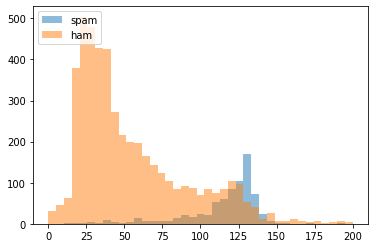

In [55]:
bins = np.linspace(0, 200, 40)

plt.hist(data[data['label']=='spam']['length'], bins, alpha=0.5, label='spam')
plt.hist(data[data['label']=='ham']['length'], bins, alpha=0.5, label='ham')
plt.legend(loc='upper left')


Text(0.5, 1.0, 'Text length Distribution')

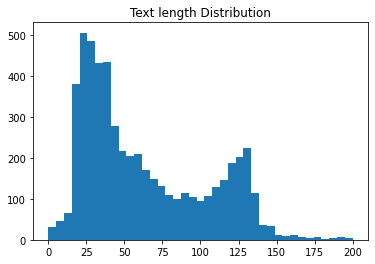

In [56]:
bins = np.linspace(0, 200, 40)

plt.hist(data['length'], bins)
plt.title('Text length Distribution')

Text(0.5, 1.0, 'Punctuation % Distribution')

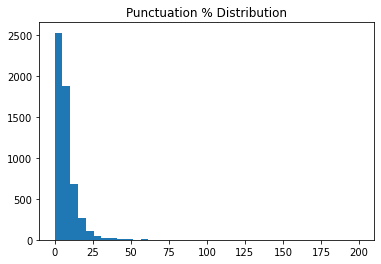

In [57]:
bins = np.linspace(0, 200, 40)

plt.hist(data['punct%'], bins)
plt.title('Punctuation % Distribution')

### Model-Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
from sklearn.model_selection import KFold, cross_val_score

In [62]:
rf = RandomForestClassifier(n_jobs=-1)

In [63]:
k_fold = KFold(n_splits=5)

In [65]:
# features of tdidf
x_features = pd.concat([data['length'], data['punct%'], pd.DataFrame(x_tfidf.toarray())], axis=1)

In [81]:
# featurs of countvectorizer
x1_features = pd.concat([data['length'], data['punct%'], pd.DataFrame(x_counts.toarray())], axis=1)

In [66]:
x_features.head()

,length,punct%,0,1,2,3,4,5,6,7,...,8050,8051,8052,8053,8054,8055,8056,8057,8058,8059
0,92,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39,15.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
cross_val_score(rf, x_features, data['label'], cv=k_fold, scoring='accuracy',n_jobs=-1)

array([0.97578475, 0.97757848, 0.97576302, 0.97307002, 0.97127469])

### Randomforest classifier through holdout set

In [68]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x_features, data['label'], test_size=0.2)

In [70]:
len(x_train)

4457

In [73]:
len(x_test)

1115

In [74]:
model = rf.fit(x_train, y_train)

In [76]:
sorted(zip(model.feature_importances_, x_train.columns), reverse=True)[0:10]

[(0.06282431602281104, 'length'),
 (0.04335097283230979, 8038),
 (0.0303192557239902, 7292),
 (0.02845634377990368, 1789),
 (0.018864349532157352, 3118),
 (0.0174949881918066, 2018),
 (0.015307586508494276, 4765),
 (0.013633989008093433, 6695),
 (0.013270747972780654, 6976),
 (0.01228236092283323, 6236)]

In [78]:
y_predict = model.predict(x_test)
precision, recall, fscore, support = score(y_test, y_predict, pos_label='spam', average='binary')

In [80]:
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 2),
                                                        round(recall, 2),
                                                        round((y_predict==y_test).sum() / len(y_predict), 2)))

Precision: 0.99 / Recall: 0.83 / Accuracy: 0.98


### Exploring parameters using GridSearch Cv

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
# creating the dictionary 
param = {'n_estimators': [10, 150, 300],
        'max_depth':[30, 60, 90, None]}

# for features based on tfidf 
gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(x_tfidf, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,28.699759,4.064826,0.901378,0.061869,None,300,"{'max_depth': None, 'n_estimators': 300}",0.975785,0.974888,0.973968,0.972172,0.973070,0.973977,0.001279,1
8,36.138859,5.406791,0.740195,0.129165,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.975785,0.973094,0.974865,0.970377,0.973968,0.973618,0.001852,2
10,20.664990,0.636673,0.635297,0.229451,None,150,"{'max_depth': None, 'n_estimators': 150}",0.977578,0.972197,0.973968,0.972172,0.972172,0.973618,0.002098,3
7,24.672790,0.609028,0.921268,0.366080,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.976682,0.972197,0.973070,0.971275,0.972172,0.973079,0.001889,4
6,1.343651,0.750541,0.422195,0.136190,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.981166,0.973991,0.973070,0.965889,0.968582,0.972539,0.005229,5


In [84]:
# creating the dictionary
param = {'n_estimators': [10, 150, 300],
        'max_depth':[30, 60, 90, None]}

#  for features based on countvectorizer
gs1 = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs1_fit = gs1.fit(x_counts, data['label'])
pd.DataFrame(gs1_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,50.716510,4.593909,0.900517,0.426346,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.974888,0.971300,0.973070,0.970377,0.970377,0.972002,0.001746,1
7,28.317073,0.455039,0.813976,0.057832,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.973991,0.971300,0.975763,0.966786,0.969479,0.971464,0.003185,2
11,28.067637,12.015548,0.299270,0.072461,None,300,"{'max_depth': None, 'n_estimators': 300}",0.975785,0.971300,0.973070,0.967684,0.967684,0.971105,0.003137,3
6,2.322931,0.336894,0.384247,0.069574,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.973991,0.973991,0.970377,0.962298,0.973968,0.970925,0.004534,4
10,33.873301,0.434133,0.781000,0.181249,None,150,"{'max_depth': None, 'n_estimators': 150}",0.972197,0.972197,0.973968,0.968582,0.964991,0.970387,0.003217,5


### Model-Gradient Boosting Classifier

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
gbc = GradientBoostingClassifier()

In [88]:
def train_gb(est, max_depth, lr):
    gb_model = gbc.fit(x_train, y_train)
    y_predict1 = gb_model.predict(x_test)
    precision1, recall1, fscore1, support1 = score(y_test, y_predict1, pos_label='spam', average='binary')
    print('est: {} / Depth: {} / LR: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    est, max_depth, lr, round(precision1, 2), round(recall1, 2),
    round(y_predict1==y_test).sum() / len(y_predict1), 2))

In [89]:
for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_gb(n_est, max_depth, lr)

est: 50 / Depth: 3 / LR: 0.01 ---- Precision: 0.95 / Recall: 0.82 / Accuracy: 0.9695067264573991
est: 50 / Depth: 3 / LR: 0.1 ---- Precision: 0.94 / Recall: 0.81 / Accuracy: 0.968609865470852
est: 50 / Depth: 3 / LR: 1 ---- Precision: 0.95 / Recall: 0.82 / Accuracy: 0.9695067264573991
est: 50 / Depth: 7 / LR: 0.01 ---- Precision: 0.95 / Recall: 0.82 / Accuracy: 0.9695067264573991
est: 50 / Depth: 7 / LR: 0.1 ---- Precision: 0.94 / Recall: 0.8 / Accuracy: 0.967713004484305
est: 50 / Depth: 7 / LR: 1 ---- Precision: 0.94 / Recall: 0.8 / Accuracy: 0.967713004484305
est: 50 / Depth: 11 / LR: 0.01 ---- Precision: 0.94 / Recall: 0.81 / Accuracy: 0.968609865470852
est: 50 / Depth: 11 / LR: 0.1 ---- Precision: 0.94 / Recall: 0.8 / Accuracy: 0.967713004484305
est: 50 / Depth: 11 / LR: 1 ---- Precision: 0.94 / Recall: 0.81 / Accuracy: 0.968609865470852
est: 50 / Depth: 15 / LR: 0.01 ---- Precision: 0.94 / Recall: 0.8 / Accuracy: 0.967713004484305
est: 50 / Depth: 15 / LR: 0.1 ---- Precision: 0.9

### Evaluating Gradient Boosting with GridSearch Cv

In [91]:
# creating the dictionary 
param = {'n_estimators': [100, 150],
        'max_depth':[7, 11, 15],
        'learning_rate': [0.1]
        }

# for features based on tfidf 
gs2 = GridSearchCV(gbc, param, cv=5, n_jobs=-1)
gs2_fit = gs2.fit(x_tfidf, data['label'])
pd.DataFrame(gs2_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,12.958410,0.383819,0.011533,0.000921,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.971300,0.973991,0.967684,0.972172,0.970377,0.971105,0.002085,1
0,8.705394,0.316323,0.008305,0.000329,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.970404,0.973991,0.968582,0.971275,0.969479,0.970746,0.001856,2
3,18.056358,0.699055,0.017522,0.003669,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.968610,0.974888,0.969479,0.965889,0.967684,0.969310,0.003033,3
2,10.897573,0.178000,0.011505,0.001521,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.970404,0.974888,0.967684,0.964093,0.966786,0.968771,0.003663,4
5,15.292908,2.156160,0.012786,0.001762,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.966816,0.975785,0.967684,0.963196,0.965889,0.967874,0.004232,5


In [93]:
# creating the dictionary 
param = {'n_estimators': [100, 150],
        'max_depth':[7, 11, 15],
        'learning_rate': [0.1]
        }

# for features based on tfidf 
gs4 = GridSearchCV(gbc, param, cv=5, n_jobs=-1)
gs4_fit = gs4.fit(x_counts, data['label'])
pd.DataFrame(gs4_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,14.477459,0.557472,0.017910,0.002354,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.980269,0.973094,0.970377,0.966786,0.966786,0.971463,0.005003,1
2,9.013494,0.467634,0.012690,0.001534,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.978475,0.973094,0.969479,0.965889,0.968582,0.971104,0.004347,2
1,9.990630,0.330863,0.011062,0.001245,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.979372,0.973094,0.967684,0.965889,0.969479,0.971104,0.004772,3
5,11.514805,1.386465,0.013073,0.002359,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.979372,0.970404,0.970377,0.964991,0.967684,0.970566,0.004837,4
0,6.663660,0.121482,0.008055,0.000212,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.980269,0.967713,0.969479,0.965889,0.968582,0.970386,0.005082,5


### Model Selection